#***Модуль А*** 


In [437]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import pickle 

##1.1 Загрузка данных

In [438]:
data = pd.read_csv("weather.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


##1.2 Предобработка данных

In [439]:
def replacer(data, colum, var , to_var):
  data[colum] = data[colum].replace(var , to_var)  

In [440]:
data = data.fillna(0)
replacer(data, 'RainToday', 'No', 0)
replacer(data, 'RainToday', 'Yes', 1)
replacer(data, 'RainTomorrow', 'No', 0)
replacer(data, 'RainTomorrow', 'Yes', 1)

Дадим каждому направлению ветра численное представление. От 1 до 16 по часовой стрелке. За нуль обозначим неизвестное направление.

In [441]:
def RoseOfWind(data, col):
  data[col] = data[col].replace("N"  ,  1)
  data[col] = data[col].replace("NNE",  2)
  data[col] = data[col].replace("NE" ,  3)
  data[col] = data[col].replace("ENE",  4)
  data[col] = data[col].replace("E"  ,  5)
  data[col] = data[col].replace("ESE",  6)
  data[col] = data[col].replace("SE" ,  7)
  data[col] = data[col].replace("SSE",  8)
  data[col] = data[col].replace("S"  ,  9)
  data[col] = data[col].replace("SSW", 10)
  data[col] = data[col].replace("SW" , 11)
  data[col] = data[col].replace("WSW", 12)
  data[col] = data[col].replace("W"  , 13)
  data[col] = data[col].replace("WNW", 14)
  data[col] = data[col].replace("NW" , 15)
  data[col] = data[col].replace("NNW", 16)

In [442]:
RoseOfWind(data, 'WindGustDir')
RoseOfWind(data, 'WindDir9am')
RoseOfWind(data, 'WindDir3pm')

Дадим каждому месту уникальный номер. И заменим значения в столбце ***location***.

In [443]:
Loclst = data['Location'].unique()
numLoc = len(Loclst)
tokenizer = Tokenizer(num_words= 50)
tokenizer.fit_on_texts(Loclst)
tokenizer.word_index

{'adelaide': 33,
 'albany': 37,
 'albury': 1,
 'alicesprings': 46,
 'badgeryscreek': 2,
 'ballarat': 19,
 'bendigo': 20,
 'brisbane': 29,
 'cairns': 30,
 'canberra': 16,
 'cobar': 3,
 'coffsharbour': 4,
 'dartmoor': 28,
 'darwin': 47,
 'goldcoast': 31,
 'hobart': 44,
 'katherine': 48,
 'launceston': 45,
 'melbourne': 23,
 'melbourneairport': 22,
 'mildura': 24,
 'moree': 5,
 'mountgambier': 34,
 'mountginini': 18,
 'newcastle': 6,
 'nhil': 25,
 'norahhead': 7,
 'norfolkisland': 8,
 'nuriootpa': 35,
 'pearceraaf': 39,
 'penrith': 9,
 'perth': 41,
 'perthairport': 40,
 'portland': 26,
 'richmond': 10,
 'sale': 21,
 'salmongums': 42,
 'sydney': 11,
 'sydneyairport': 12,
 'townsville': 32,
 'tuggeranong': 17,
 'uluru': 49,
 'waggawagga': 13,
 'walpole': 43,
 'watsonia': 27,
 'williamtown': 14,
 'witchcliffe': 38,
 'wollongong': 15,
 'woomera': 36}

In [444]:
sequenc = tokenizer.texts_to_sequences(data['Location'])
index = 68012
print(data['Location'][index])
print(sequenc[index])

Melbourne
[23]


In [445]:
seq = []
for i in range(len(sequenc)):
  seq.append(sequenc[i][0])
data['Location'] = seq 

Перепишем дату как 3 числовых значения. Год, месяц, число.


In [446]:
date = data['Date']
years = []
month = []
days = []
for i in range(len(date)):
  splited = date[i].split('-')
  years.append(int(splited[0]))
  month.append(int(splited[1]))
  days.append(int(splited[2]))

In [447]:
data['Years'] = years
data['Month'] = month
data['Days'] = days
data = data.drop(['Date'], axis=1)

In [448]:
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Month,Days
0,1,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,0.0,0.0,14,44.0,16,12,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,0.0,0.0,12,46.0,13,12,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,0.0,0.0,3,24.0,7,5,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,0.0,0.0,13,41.0,4,15,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


## 1.3 Предвариетельное изучение

In [449]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [450]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Years,Month,Days
0,1,13.4,22.9,0.6,0.0,0.0,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,2008,12,1
1,1,7.4,25.1,0.0,0.0,0.0,14,44.0,16,12,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0,0,2008,12,2
2,1,12.9,25.7,0.0,0.0,0.0,12,46.0,13,12,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0,0,2008,12,3
3,1,9.2,28.0,0.0,0.0,0.0,3,24.0,7,5,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0,0,2008,12,4
4,1,17.5,32.3,1.0,0.0,0.0,13,41.0,4,15,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,0.0,0.0,5,31.0,7,4,13.0,11.0,51.0,24.0,1024.6,1020.3,0.0,0.0,10.1,22.4,0,0,2017,6,21
145456,49,3.6,25.3,0.0,0.0,0.0,16,22.0,7,1,13.0,9.0,56.0,21.0,1023.5,1019.1,0.0,0.0,10.9,24.5,0,0,2017,6,22
145457,49,5.4,26.9,0.0,0.0,0.0,1,37.0,7,14,9.0,9.0,53.0,24.0,1021.0,1016.8,0.0,0.0,12.5,26.1,0,0,2017,6,23
145458,49,7.8,27.0,0.0,0.0,0.0,7,28.0,8,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


In [451]:
rain = data['RainTomorrow'].values
data = data.drop(['RainTomorrow'], axis=1)
data['RainTomorrow'] = rain

In [452]:
data.to_csv("watherPolyPreProcces.csv",index=False)

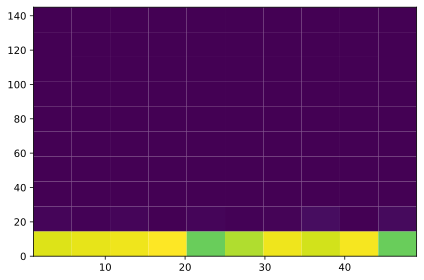

In [453]:
n_bins = 49
location = data['Location']
MaxTemp = data['Evaporation']
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(location, MaxTemp)
plt.show();

In [454]:
print( "Максимальная зафиксированная температура:", data['MaxTemp'].max())
print( "Минимальная зафиксированная температура:", data['MinTemp'].min())
print( "Максимальное количество осадков:", data['Rainfall'].max())
print( "Максимальная зафикисированная скорость ветра:", data['WindGustSpeed'].max())

Максимальная зафиксированная температура: 48.1
Минимальная зафиксированная температура: -8.5
Максимальное количество осадков: 371.0
Максимальная зафикисированная скорость ветра: 135.0


#***Модуль B*** 

##2.1 Отбор признаков

In [455]:
def maxIndex(mas):
  max = 0 
  maxInd = 0
  for i in range(len(mas)):
    if mas[i] > max:
      max = mas[i]
      maxInd = i
  print("max: ",max)
  print("maxInd: ",maxInd)
  return maxInd

In [456]:
from sklearn.ensemble import ExtraTreesClassifier

array = data.values
X = array[:,0:24]
Y = array[:,24]
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.03365959 0.03861488 0.03611493 0.02899829 0.02403439 0.04270878
 0.03401371 0.05301455 0.03479238 0.03585493 0.03322847 0.03478676
 0.04610633 0.1364729  0.0362314  0.0392879  0.03145949 0.04657359
 0.03566217 0.0384969  0.06136193 0.03204521 0.03258518 0.03389534]


In [457]:
id = []
for col in data.columns:
    id.append(col)
id.pop(24)
feat = model.feature_importances_.tolist()
ff = pd.DataFrame()
ff['Признак'] = id
ff['Важность признака'] = feat
ff.sort_values(by=['Важность признака'], ascending = False)

,Признак,Важность признака
13,Humidity3pm,0.136473
20,RainToday,0.061362
7,WindGustSpeed,0.053015
17,Cloud3pm,0.046574
12,Humidity9am,0.046106
5,Sunshine,0.042709
15,Pressure3pm,0.039288
1,MinTemp,0.038615
19,Temp3pm,0.038497
14,Pressure9am,0.036231


Из полученной таблицы видно, что самую большую важность представляют признаки "Humidity3pm", "RainToday", "WindGustSpeed", "Cloud3pm", "Humidity9am". В дальнейших вычислениях будут использоваться только первые 10 признаков. Так как показывают наибольшую важность в предсказании.

##2.2 Визуальное обоснование выбора переменных

In [458]:
idNum = []
corrArr = []
for i in range(24):
    idNum.append(i)
for col in data.columns:
    corrArr.append(np.corrcoef(data[col].values, data['RainTomorrow'].values)[0][1])
corrArr.pop(24)

0.9999999999999999

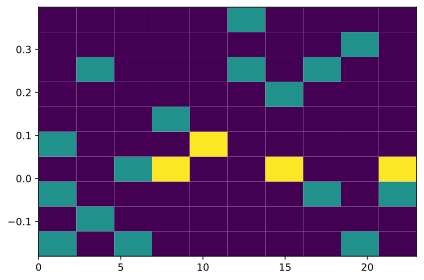

In [459]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(idNum, corrArr)

(array([3., 1., 3., 7., 3., 1., 1., 3., 1., 1.]),
 array([-0.18079056, -0.12291637, -0.06504217, -0.00716797,  0.05070623,
         0.10858043,  0.16645462,  0.22432882,  0.28220302,  0.34007722,
         0.39795141]),
 <a list of 10 Patch objects>)

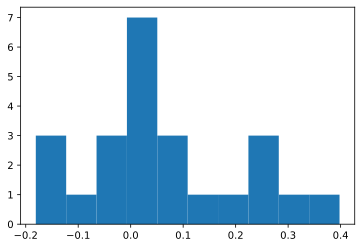

In [460]:
fig, axs = plt.subplots()
axs.hist(corrArr)

##2.3 Разбиение данных на обучающую и тестирующую выборки

In [461]:
from sklearn.model_selection import train_test_split
dataFeat = pd.DataFrame()
dataFeat['Humidity3pm'] = data['Humidity3pm']
dataFeat['WindGustSpeed'] = data['WindGustSpeed']
dataFeat['Cloud3pm'] = data['Cloud3pm']
dataFeat['Humidity9am'] = data['Humidity9am']
dataFeat['RainToday'] = data['RainToday']
dataFeat['Sunshine'] = data['Sunshine']
dataFeat['Temp3pm'] = data['Temp3pm']
dataFeat['Pressure3pm'] = data['Pressure3pm']
dataFeat['MinTemp'] = data['MinTemp']
dataFeat['MaxTemp'] = data['MaxTemp']
x = dataFeat.values 
dataFeat['RainTomorrow'] = data['RainTomorrow']
y = data['RainTomorrow'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
dataFeat.to_csv("watherPreProcces.csv",index=False)

##2.4 Аргументированный выбор модели классификации

In [462]:
from sklearn import ensemble
from sklearn import metrics

### Градиентный бустинг для классификации 
Градиентный бустинг показал точность в 85%.

In [463]:
GrBosstClass = ensemble.GradientBoostingClassifier()
GrBosstClass.fit(x_train, y_train)
y_pred = GrBosstClass.predict(x_test)
model_score = GrBosstClass.score(x_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae)

Model Score            :  0.8480338237316101
R Square               :  0.10510426723155175
Mean Squared Error     :  0.15196617626838993
Root Mean Squared Error:  0.3898283933583981
Mean Absolute Error    :  0.15196617626838993


In [464]:
model = pickle.dumps(GrBosstClass)
GrBosstClass_byte = pickle.loads(model)
with open('GrBosstClass.pkl', 'wb') as output:
       pickle.dump(GrBosstClass, output)

### Бэггинг для классификации 
Бэггинг показал точность в 84%.

In [465]:
Bagging = ensemble.BaggingClassifier()
Bagging.fit(x_train, y_train)
y_pred = Bagging.predict(x_test)
model_score = Bagging.score(x_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae)

Model Score            :  0.8374810944589578
R Square               :  0.042961541612932974
Mean Squared Error     :  0.1625189055410422
Root Mean Squared Error:  0.4031363361705841
Mean Absolute Error    :  0.1625189055410422


### Байесовский классификатор
Байесовский классификатор показал точность в 79%.

In [467]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
model_score = clf.score(x_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Model Score            : ", model_score)
print("R Square               : ", r_square)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Mean Absolute Error    : ", mae)

Model Score            :  0.7874329712635776
R Square               :  -0.25176096164670536
Mean Squared Error     :  0.2125670287364224
Root Mean Squared Error:  0.46104992000478906
Mean Absolute Error    :  0.2125670287364224


### Нейронная сеть
Нейронная сеть показала точность в 78%.

Epoch 1/10
1455/1455 [==============================] - 5s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7798 - val_loss: 0.0000e+00 - val_accuracy: 0.7822

Epoch 00001: val_accuracy improved from -inf to 0.78216, saving model to bestModel.h5
Epoch 2/10
1455/1455 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7798 - val_loss: 0.0000e+00 - val_accuracy: 0.7822

Epoch 00002: val_accuracy did not improve from 0.78216
Epoch 3/10
1455/1455 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7798 - val_loss: 0.0000e+00 - val_accuracy: 0.7822

Epoch 00003: val_accuracy did not improve from 0.78216
Epoch 4/10
1455/1455 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7798 - val_loss: 0.0000e+00 - val_accuracy: 0.7822

Epoch 00004: val_accuracy did not improve from 0.78216
Epoch 5/10
1455/1455 [==============================] - 4s 3ms/step - loss: 0.0000e+00 - accuracy: 0.7798 - val_loss: 0.0000e+00 - val_ac

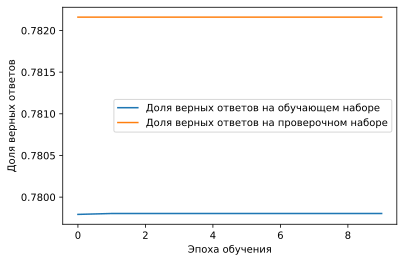

In [468]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

save_path = 'bestModel.h5'
checkpoin_callback = ModelCheckpoint(save_path, monitor= "val_accuracy", save_best_only= True , verbose = 1 )

model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64 , validation_split= 0.2, callbacks = [checkpoin_callback] )

model.load_weights(save_path)
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Доля верных ответов:', test_acc) 

plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Из всех рассмотреных моделей машинного обучения лучше всех показал себя градиентный бустинг. Градиентный бустинг показал точность предсказаний в 84% на тестовой выборке. 

#***Модуль C***

Сериализуем модели

In [468]:
model = pickle.dumps(Bagging)
Bagging_byte = pickle.loads(model)
with open('Bagging.pkl', 'wb') as output:
       pickle.dump(Bagging, output)

In [ ]:
model = pickle.dumps(GrBosstClass)
GrBosstClass_byte = pickle.loads(model)
with open('GrBosstClass.pkl', 'wb') as output:
       pickle.dump(GrBosstClass, output)